# Main Course Week 4: Exercises

**Comments:** This one took a little more time because I don't have a lot of experience working with importing and opening/writing CSV and JSON files, but it wasn't too difficult either. Definitely curious on how to build off of this into analyzing and visualizing the data that we load into a dataframe.

## Ch. 9 Exercises
---

### 9.3 Class Average: Writing Students Records to a CSV File

An instructor teaches a class in which each student takes three exams. The instructor would like to store this information in a file named `grades.csv` for later use. Write code that enables an instructor to enter each student's first name and last name as strings and the student's three exam grades as integers. Use the `csv` module to write each record into the `grades.csv` file. Each record should be a single line of text in the following CSV format:

*firstname,lastname,exam1grade,exam2grade,exam3grade* 

In [1]:
import csv

def enter_grades(first_name, last_name, exam_grades):
    with open('grades.csv', mode='a', newline='') as grades:
        writer = csv.writer(grades)
        writer.writerow([first_name, last_name, exam_grades[0], exam_grades[1], exam_grades[2]])

enter_grades('Chris', 'Zhang', [99, 100, 95])
enter_grades('Jimmy', 'Garoppolo', [65, 90, 85])
enter_grades('Stephen', 'Curry', [95, 98, 87])

### 9.4 Class Average: Reading Student Records from a CSV File

Use the `csv` module to read the `grades.csv` from the previous exercise. Display the data in tabular format.

In [2]:
with open('grades.csv', mode='r', newline='') as grades:
    print(f'{"First":<15}{"Last":<15}{"Exam 1":<10}{"Exam 2":<10}{"Exam 3":<10}')
    reader = csv.reader(grades)
    for student in reader:
        first, last, exam1, exam2, exam3 = student
        print(f'{first:<15}{last:<15}{exam1:<10}{exam2:<10}{exam3:<10}')

First          Last           Exam 1    Exam 2    Exam 3    
Chris          Zhang          99        100       95        
Jimmy          Garoppolo      65        90        85        
Stephen        Curry          95        98        87        


### 9.16 Data Science: Working with the diamonds.csv Dataset in Pandas

a) Download `diamonds.csv` from one of the dataset respositories.

In [2]:
import pandas as pd

b) Load the dataset into a pandas DataFrame with the following statement, which uses the first column of each record  as the row index:

```python
df = pd.read_csv('diamonds.csv', index_col=0)
```

In [3]:
df = pd.read_csv('diamonds.csv', index_col=0)

c) Display the first seven rows of the DataFrame.

In [4]:
df.head(7)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


d) Display the last seven rows of the DataFrame.

In [5]:
df.tail(7)

,carat,cut,color,clarity,depth,table,price,x,y,z
53934,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


e) Use the DataFrame method describe (which looks only at the numerical columns) to calculate the descriptive statistics for the numerical columns -- carat, depth, table, price, x, y and z.

In [6]:
pd.set_option('precision', 2)

df.describe()

,carat,depth,table,price,x,y,z
count,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00
mean,0.80,61.75,57.46,3932.80,5.73,5.73,3.54
std,0.47,1.43,2.23,3989.44,1.12,1.14,0.71
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,950.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
75%,1.04,62.50,59.00,5324.25,6.54,6.54,4.04
max,5.01,79.00,95.00,18823.00,10.74,58.90,31.80


f) Use Series method describe to calculate the descriptive statistics for the categorical data (text) columns -- cut, color and clarity

In [7]:
df.cut.describe()

count     53940
unique        5
top       Ideal
freq      21551
Name: cut, dtype: object

In [8]:
df.color.describe()

count     53940
unique        7
top           G
freq      11292
Name: color, dtype: object

In [9]:
df.clarity.describe()

count     53940
unique        8
top         SI1
freq      13065
Name: clarity, dtype: object

g) What are the unique category values?

In [10]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [11]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [12]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

h) View histograms of each numerical data column

In [14]:
%config InlineBackend.figure_format = 'retina'

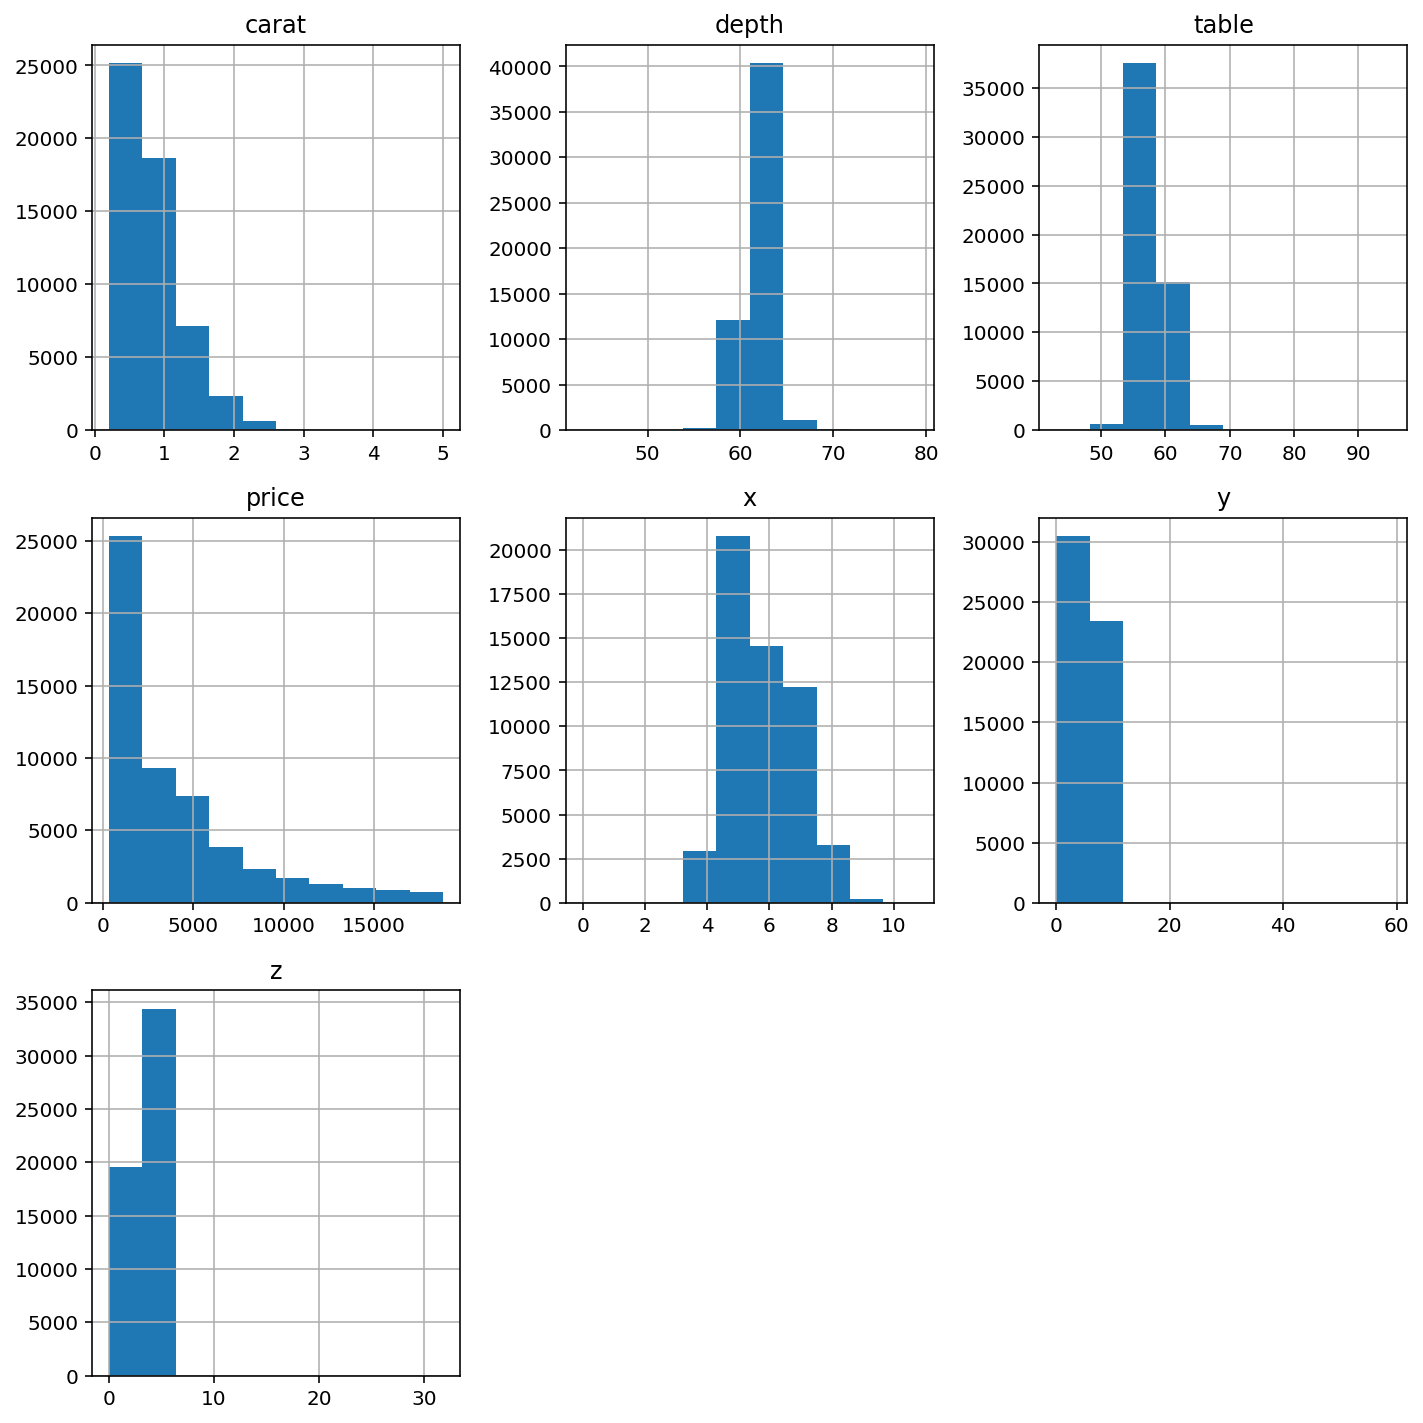

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plots = df.hist(figsize=(10,10))
plt.tight_layout()

### 9.18 Project: Anscombe's Quartet CSV

Locate a CSV file online containing the data for Anscombe's Quartet. Load the data into a pandas DataFrame. Investigate pandas built-in scatter plot capability for plotting x-y coordinate pairs and use it to plot the x-y coordinate pairs in Anscombe's Quartet.

In [14]:
df_ans = pd.read_csv('Anscombe_quartet_data.csv')

df_ans

,x123,y1,y2,y3,x4,y4
0,10.0,8.04,9.14,7.46,8.0,6.58
1,8.0,6.95,8.14,6.77,8.0,5.76
2,13.0,7.58,8.74,12.74,8.0,7.71
3,9.0,8.81,8.77,7.11,8.0,8.84
4,11.0,8.33,9.26,7.81,8.0,8.47
5,14.0,9.96,8.10,8.84,8.0,7.04
6,6.0,7.24,6.13,6.08,8.0,5.25
7,4.0,4.26,3.10,5.39,19.0,12.50
8,12.0,10.84,9.13,8.15,8.0,5.56
9,7.0,4.82,7.26,6.42,8.0,7.91


<AxesSubplot:xlabel='x123', ylabel='y1'>

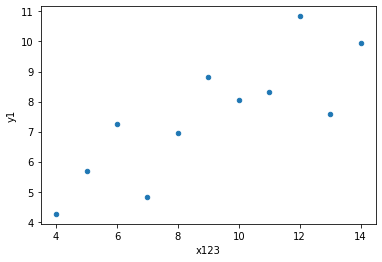

In [15]:
df_ans.plot.scatter(x='x123', y='y1')

<AxesSubplot:xlabel='x123', ylabel='y2'>

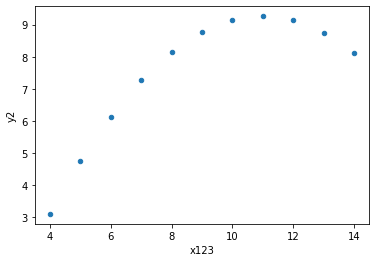

In [16]:
df_ans.plot.scatter(x='x123', y='y2')

<AxesSubplot:xlabel='x123', ylabel='y3'>

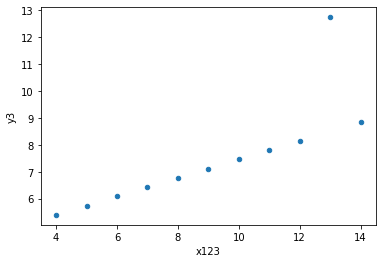

In [17]:
df_ans.plot.scatter(x='x123', y='y3')

<AxesSubplot:xlabel='x4', ylabel='y4'>

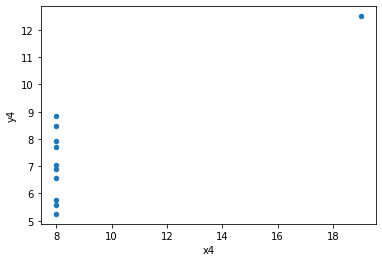

In [18]:
df_ans.plot.scatter(x='x4', y='y4')

### 9.6 Class Average: Writing a Gradebook Dictionary to a JSON File

Reimplement Exercise 9.3 using the json module to write the student info to the file in JSON format. 

In [19]:
import json

gradebook_dict = {'students': [{'first': 'Chris', 'last': 'Zhang', 'grades': [95, 100, 97]}, 
                              {'first': 'Jimmy', 'last': 'Garoppolo', 'grades': [65, 90, 85]}, 
                              {'first': 'Stephen', 'last': 'Curry', 'grades': [95, 98, 87]}]}

with open('grades.json', 'w') as grades:
    json.dump(gradebook_dict, grades)

In [20]:
with open('grades.json', 'r') as grades:
    grades_json = json.load(grades)
    
grades_json

{'students': [{'first': 'Chris', 'last': 'Zhang', 'grades': [95, 100, 97]},
  {'first': 'Jimmy', 'last': 'Garoppolo', 'grades': [65, 90, 85]},
  {'first': 'Stephen', 'last': 'Curry', 'grades': [95, 98, 87]}]}

### 9.7 Class Average: Reading a Gradebook Dictionary from a JSON File

Reimplement Exercise 9.4 using the json module to read the grades.jsonfile created in the previous exercise.

In [21]:
import json

with open('grades.json', 'r') as grades:
    grades_json = json.load(grades)
    
grades_json

{'students': [{'first': 'Chris', 'last': 'Zhang', 'grades': [95, 100, 97]},
  {'first': 'Jimmy', 'last': 'Garoppolo', 'grades': [65, 90, 85]},
  {'first': 'Stephen', 'last': 'Curry', 'grades': [95, 98, 87]}]}

## Ch. 10 Exercises
---

### 10.2 Account Class with Read-Only Properties

Modify Account class to provide read-only properties for the name and balance. Rename the class attributes with single leading underscores. Test your updated class. To show that name and balance are read-only, try to assign new values to them.

In [22]:
# account.py
"""Account class definition."""
from decimal import Decimal

class Account:
    """Account class for maintaining a bank account balance."""
    
    def __init__(self, name, balance):
        """Initialize an Account object."""

        # if balance is less than 0.00, raise an exception
        if balance < Decimal('0.00'):
            raise ValueError('Initial balance must be >= to 0.00.')

        self._name = name
        self._balance = balance
    
    @property
    def name(self):
        """Return the name"""
        return self._name
    
    @property
    def balance(self):
        """Return the balance"""
        return self._balance
        

    def deposit(self, amount):
        """Deposit money to the account."""

        # if amount is less than 0.00, raise an exception
        if amount < Decimal('0.00'):
            raise ValueError('amount must be positive.')

        self._balance += amount

    def withdraw(self, amount):
        """Withdraw money from account."""

        #if amount is more than balance, raise an exception
        if amount > self._balance:
            raise ValueError('Withdrawal amount must be less than or equal to balance.')

        #if amount is less than 0.00, raise an exception
        if amount < Decimal('0.00'):
            raise ValueError('Withdrawal amount must be positive.')

        self._balance -= amount

In [23]:
my_account = Account('Chris Zhang', Decimal('1000.00'))

In [24]:
my_account.balance

Decimal('1000.00')

In [25]:
my_account.name

'Chris Zhang'

In [26]:
my_account.balance = Decimal('50.00')

AttributeError: can't set attribute

In [27]:
my_account.name = 'Jeff Wilson'

AttributeError: can't set attribute

### 10.5 Duck Typing

Create a class SalariedEmployee for an employee that gets paid a fixed weekly salary. Do *not* inherit from CommissionEmployee or SalariedCommissionEmployee. In class SalariedEmployee, override method `__repr__` and provide an earnings method. Demonstrate duck typing by creating an object of your class, adding it to the list at the end, then executing the loop to show that it properly processes objects of all three classes.

Importing CommissionEmployee and SalariedCommissionEmployee Classes, and creating list of such employees:

In [28]:
# commmissionemployee.py
"""CommissionEmployee base class."""
from decimal import Decimal

class CommissionEmployee:
    """An employee who gets paid commission based on gross sales."""

    def __init__(self, first_name, last_name, ssn, 
                 gross_sales, commission_rate):
        """Initialize CommissionEmployee's attributes."""
        self._first_name = first_name
        self._last_name = last_name
        self._ssn = ssn
        self.gross_sales = gross_sales  # validate via property
        self.commission_rate = commission_rate  # validate via property

    @property
    def first_name(self):
        return self._first_name

    @property
    def last_name(self):
        return self._last_name

    @property
    def ssn(self):
        return self._ssn

    @property
    def gross_sales(self):
        return self._gross_sales

    @gross_sales.setter
    def gross_sales(self, sales):
        """Set gross sales or raise ValueError if invalid."""
        if sales < Decimal('0.00'):
            raise ValueError('Gross sales must be >= to 0')
        
        self._gross_sales = sales
        
    @property
    def commission_rate(self):
        return self._commission_rate

    @commission_rate.setter
    def commission_rate(self, rate):
        """Set commission rate or raise ValueError if invalid."""
        if not (Decimal('0.0') < rate < Decimal('1.0')):
            raise ValueError(
               'Interest rate must be greater than 0 and less than 1')
        
        self._commission_rate = rate

    def earnings(self):
        """Calculate earnings."""   
        return self.gross_sales * self.commission_rate

    def __repr__(self):
        """Return string representation for repr()."""
        return ('CommissionEmployee: ' + 
            f'{self.first_name} {self.last_name}\n' +
            f'social security number: {self.ssn}\n' +
            f'gross sales: {self.gross_sales:.2f}\n' +
            f'commission rate: {self.commission_rate:.2f}')



##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################

In [29]:
# salariedcommissionemployee.py
"""SalariedCommissionEmployee derived from CommissionEmployee."""
from decimal import Decimal

class SalariedCommissionEmployee(CommissionEmployee):
    """An employee who gets paid a salary plus 
    commission based on gross sales."""

    def __init__(self, first_name, last_name, ssn, 
                 gross_sales, commission_rate, base_salary):
        """Initialize SalariedCommissionEmployee's attributes."""
        super().__init__(first_name, last_name, ssn, 
                         gross_sales, commission_rate)
        self.base_salary = base_salary  # validate via property

    @property
    def base_salary(self):
        return self._base_salary

    @base_salary.setter
    def base_salary(self, salary):
        """Set base salary or raise ValueError if invalid."""
        if salary < Decimal('0.00'):
            raise ValueError('Base salary must be >= to 0')
        
        self._base_salary = salary

    def earnings(self):
        """Calculate earnings."""   
        return super().earnings() + self.base_salary

    def __repr__(self):
        """Return string representation for repr()."""
        return ('Salaried' + super().__repr__() +      
            f'\nbase salary: {self.base_salary:.2f}')



##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################



In [30]:
c = CommissionEmployee('Sue', 'Jones', '222-22-2222', Decimal('10000.00'), Decimal('0.06'))
s = SalariedCommissionEmployee('Bob', 'Lewis', '444-44-4444', Decimal('5000.00'), Decimal('0.04'), Decimal('300.00'))

employees = [c, s]

In [31]:
class SalariedEmployee:
    """An empoyee that gets paied a fixed weekly salary."""
    
    def __init__(self, first_name, last_name, ssn, weekly_salary):
        """Initialize SalariedEmployee's attributes."""
        self._first_name = first_name
        self._last_name = last_name
        self._ssn = ssn
        self._wk_salary = weekly_salary
        
    def earnings(self):
        """Calculate earnings"""
        return self.wk_salary * 52
    
    def __repr__(self):
        """Return string representation for repr()"""
        return(f'SalariedEmployee: {self.first_name} {self.last_name}\n' + 
              f'social security number: {self.ssn}\n' + 
              f'weekly salary: {self.wk_salary}\n'
              f'yearly salary: {self.wk_salary * 52}')

In [32]:
salemp = SalariedEmployee('Chris', 'Zhang', '111-11-1111', Decimal('200.00'))

In [33]:
employees.append(salemp)

In [34]:
for employee in employees:
    print(employee)
    print(f'{employee.earnings():,.2f}\n')

CommissionEmployee: Sue Jones
social security number: 222-22-2222
gross sales: 10000.00
commission rate: 0.06
600.00

SalariedCommissionEmployee: Bob Lewis
social security number: 444-44-4444
gross sales: 5000.00
commission rate: 0.04
base salary: 300.00
500.00

SalariedEmployee: Chris Zhang
social security number: 111-11-1111
weekly salary: 200.00
yearly salary: 10400.00
10,400.00

